<h3> Description: <br> In this notebook we'll make the following graphs, using the data obtained from the simulation of COVID-19 spread using brownian dynamics. <br><br> The Fortran code provided in this Github repo has its parameters set by default to a case where people don't follow the sanitary measures (keep your distance and stay home) and the percentage of initial infected people is 10% or 52 people: </h3>
  
  <center> <h3> v=1.0, QC=1.0, r0=1.0, N=529. </h3></center>
<ol>
    <li>Acumulated infections</li>
    <li>New infections every 40,000 simulation steps (total steps starting from infection are 200,00)</li>
    <li>Thermalization or energy equilibration</li>
    <li>Radial distribution function G(r)</li>
    <li>Mean square displacement W(t)</li>
    <li>Diffusion coefficient D(t)</li>
</ol>

<h3>0. Importing libraries and displaying data about our system</h3>

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import rcParams
rcParams["figure.figsize"] = [15,10]

In [9]:
directorio="../2. OUTPUT DATA"
INF_MAT=np.loadtxt(directorio+"/MATRIZ_INFECCION.dat")
num_inf=np.loadtxt(directorio+"/Infectadas.dat")
N=np.shape(INF_MAT)[0]
confs=np.shape(INF_MAT)[1]
dens=0.004829
L=(N/dens)**0.5
X=np.loadtxt(directorio+"/X.dat")
Y=np.loadtxt(directorio+"/Y.dat")

print("NUMBER OF PEOPLE: ",N )
print("POPULATION DENSITY: ",dens )
print("SIZE OF SIMULATION SQUARE: ",L)
print("\n")
print("INITIAL NUMBER OF INFECTED PEOPLE: ", int(num_inf[0,1]))
print("NUMBER OF NEW INFECTED PEOPLE: ", int(num_inf[-1,1]-num_inf[0,1]))
print("FINAL NUMBER OF TOTAL INFECTED PEOPLE: ", int(num_inf[-1,1]))

NUMBER OF PEOPLE:  529
POPULATION DENSITY:  0.004829
SIZE OF SIMULATION SQUARE:  330.9780807795476


INITIAL NUMBER OF INFECTED PEOPLE:  52
NUMBER OF NEW INFECTED PEOPLE:  201
FINAL NUMBER OF TOTAL INFECTED PEOPLE:  253


### 1. Graph of acumulated infections for each configuration (simulation step)

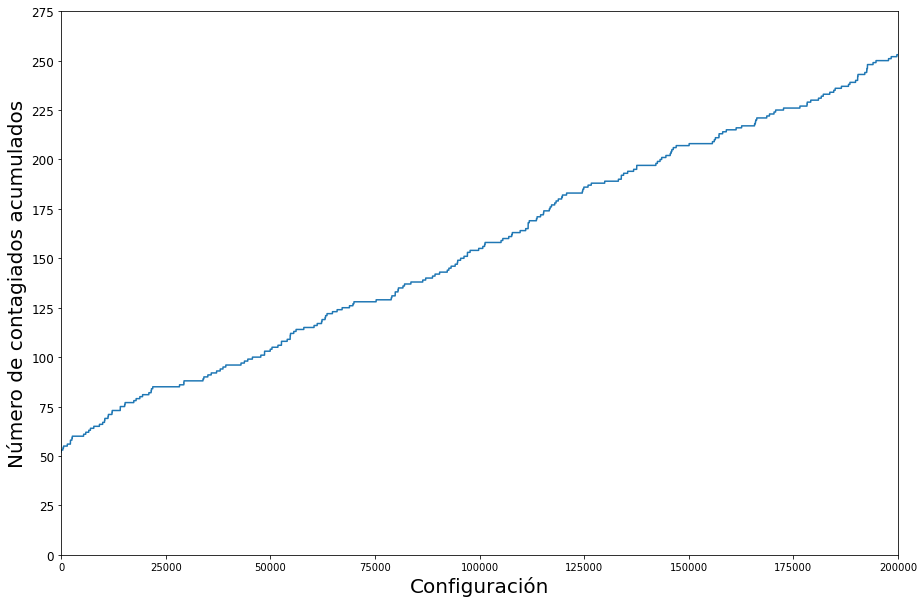

In [10]:
plt.plot(num_inf[:,0]-15000,num_inf[:,1])
plt.xlim(0,num_inf[-1,0]-15000)
plt.yticks(np.arange(0,max(num_inf[:,1])+25,25), fontsize=12)
plt.xlabel("Configuración", fontsize=20)
plt.ylabel("Número de contagiados acumulados", fontsize=20)
plt.savefig("../4. GRAPHS AND GIF ANIMATION/caso1_infectados_acumulados.PNG", dpi=250)
plt.show()

### 2.  Graph of new infected people every 40,000 configurations (simulation steps).

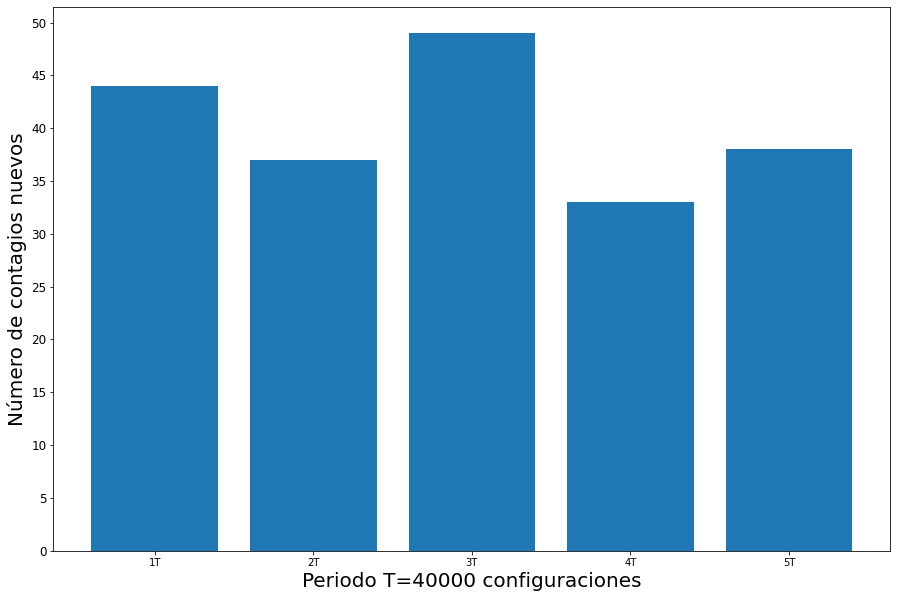

In [22]:
inf=[]
frec=40000
for i in range(0,num_inf.shape[0],frec):
    inf.append(num_inf[i,1])
inf=np.array(inf)

inf_nuev=[]
conf=[]
for j in range(len(inf)-1):
    conf.append((j+1)*frec)
    inf_nuev.append(inf[j+1]-inf[j])
etiquetas=[str(int(i/frec))+"T" for i in conf]
plt.bar(etiquetas,inf_nuev)
plt.yticks(np.arange(0,max(inf_nuev)+5,5), fontsize=12)
plt.xlabel("Periodo T={} configuraciones".format(frec), fontsize=20)
plt.ylabel("Número de contagios nuevos", fontsize=20)
plt.savefig("../4. GRAPHS AND GIF ANIMATION/caso1_numero_infectados_nuevos.PNG", dpi=250)
plt.show()

### 3. Thermalization or energy equilibration for each configuration(simulation step)

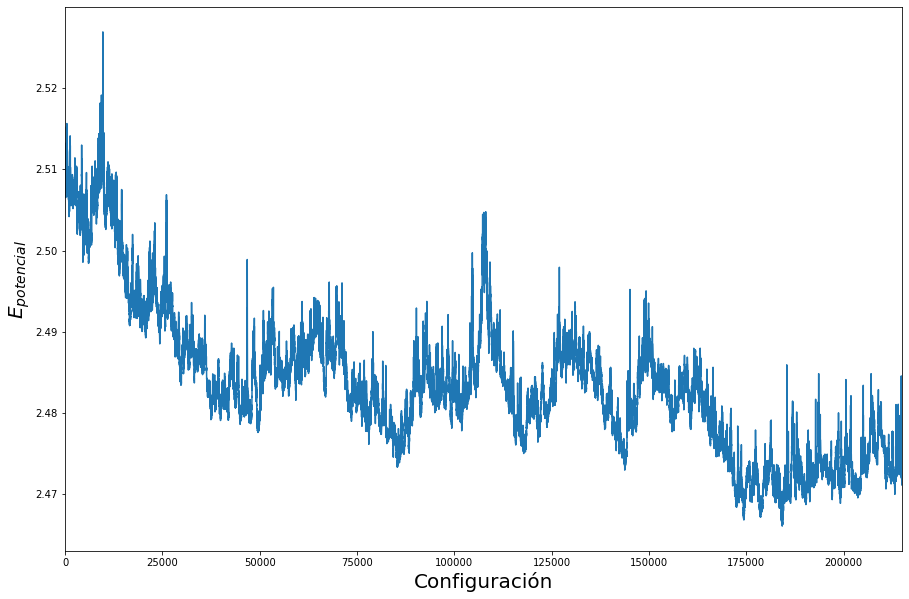

In [23]:
EP=np.loadtxt(directorio+"/EP.dat")
plt.plot(EP[1:,0], EP[1:,1])
plt.xlabel('Configuración', fontsize=20)
plt.ylabel('$E_{potencial}$', fontsize=20)
plt.xlim(0,EP[-1,0])
plt.savefig("../4. GRAPHS AND GIF ANIMATION/caso1_EPOT.PNG", dpi=250)
plt.show()

### 4. Radial distribution function $G(r^*)$.
The asterisk * , means that distances are dimensionless

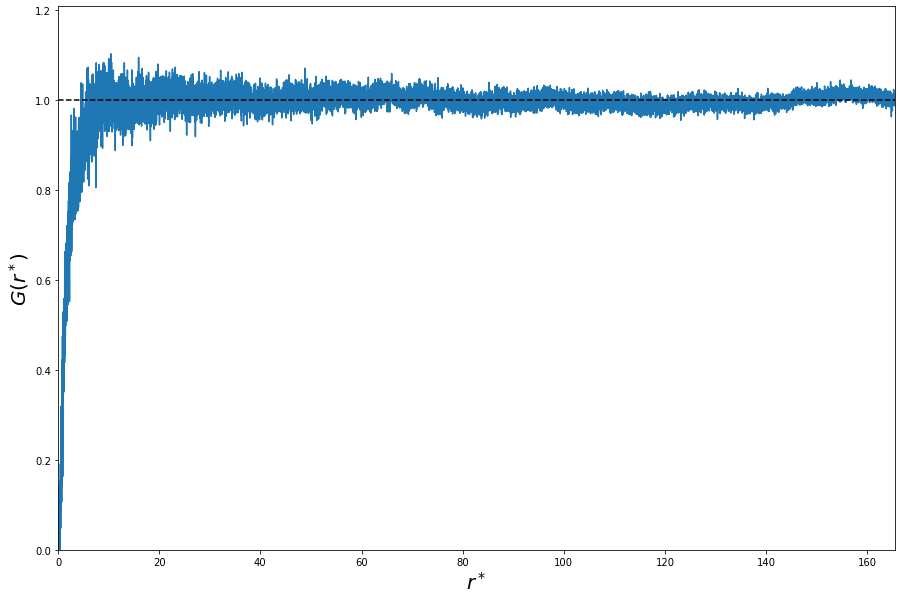

In [24]:
GDR=np.loadtxt(directorio+"/GDR.dat")
plt.plot(GDR[:,0], GDR[:,1])
plt.plot([0,GDR[-1,0]],[1,1], linestyle="--", color="black")
plt.xlabel('$r^*$', fontsize=20)
plt.ylabel('$G(r^*)$', fontsize=20)
plt.xlim(0,GDR[-1,0])
plt.ylim(0,GDR[-1,1]+0.20)
plt.savefig("../4. GRAPHS AND GIF ANIMATION/caso1_GDR.PNG", dpi=250)
plt.show()

### 5. Mean square displacement $W(t)$

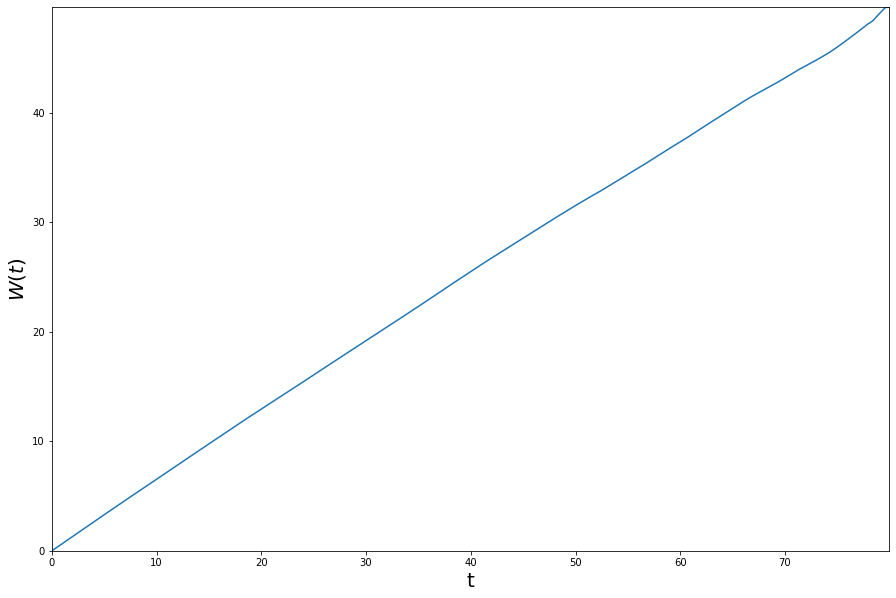

In [25]:
WT=np.loadtxt(directorio+"/WT.dat")
plt.plot(WT[:,0], WT[:,1])
plt.xlabel('t', fontsize=20)
plt.ylabel('$W(t)$', fontsize=20)
plt.xlim(0,WT[-1,0])
plt.ylim(0,WT[-1,1])

plt.savefig("../4. GRAPHS AND GIF ANIMATION/caso1_WT.PNG", dpi=250)
plt.show()

### 6. Diffusion coefficient  D(t)

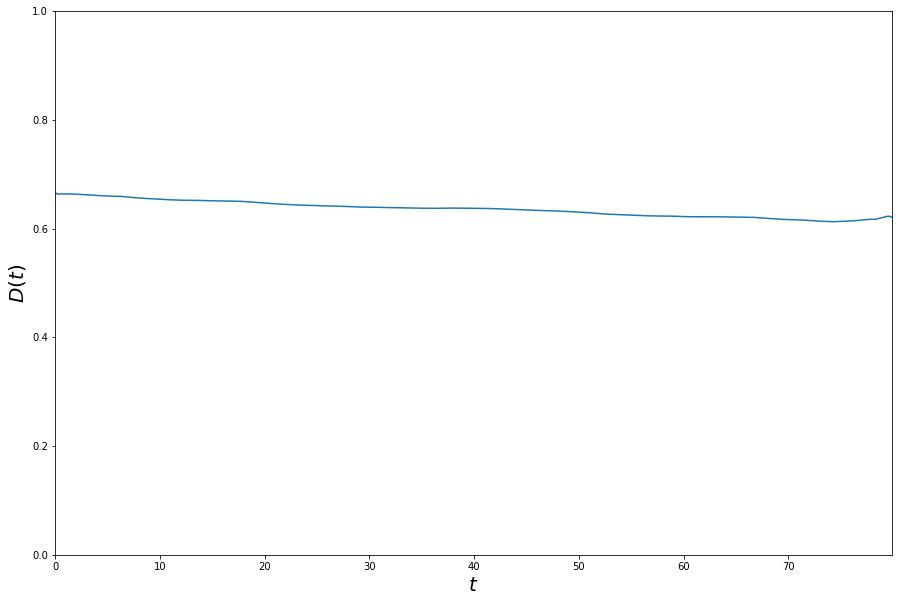

In [11]:
DT=np.loadtxt(directorio+"/DT.dat")
plt.plot(DT[:,0], DT[:,1])
plt.xlabel('$t$', fontsize=20)
plt.ylabel('$D(t)$', fontsize=20)
plt.xlim(0,DT[-1,0])
plt.ylim(0,1)
plt.savefig("../4. GRAPHS AND GIF ANIMATION/caso1_DT2.PNG", dpi=250)
plt.show()